In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"kgulina","key":"5102d54b697e7f079d383df9de226950"}'}

In [ ]:
!mkdir ~/.kaggle #создание папки
!cp kaggle.json ~/.kaggle #копия этого файла в эту папку
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download 'hossamahmedaly/patient-priority-classification'

patient-priority-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip patient-priority-classification.zip

Archive:  patient-priority-classification.zip
replace patient_priority.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: patient_priority.csv    


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("patient_priority.csv")
print(data.shape)
data.head()

(6962, 18)


,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status,triage
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked,yellow
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked,yellow
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked,orange
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked,yellow


In [ ]:
data.isna().sum()

Unnamed: 0             0
age                    0
gender                 1
chest pain type        0
blood pressure         0
cholesterol            0
max heart rate         0
exercise angina        0
plasma glucose         0
skin_thickness         0
insulin                0
bmi                    0
diabetes_pedigree      0
hypertension           0
heart_disease          0
Residence_type         0
smoking_status         0
triage               410
dtype: int64

In [ ]:
data = data.dropna()

In [ ]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [ ]:
data.isna().sum()

age                  0
gender               0
chest pain type      0
blood pressure       0
cholesterol          0
max heart rate       0
exercise angina      0
plasma glucose       0
skin_thickness       0
insulin              0
bmi                  0
diabetes_pedigree    0
hypertension         0
heart_disease        0
Residence_type       0
smoking_status       0
triage               0
dtype: int64

In [ ]:
#выделим категориальные признаки и числовые
#метод select_dtypes возвращает подмножество столбцов фрейма данных на основе dtypes столбцов
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()
print(len(categorical_cols))
categorical_cols

3


['Residence_type', 'smoking_status', 'triage']

In [ ]:
numeric_cols = data.select_dtypes(exclude=["object"]).columns.tolist()
print(len(numeric_cols))
numeric_cols

14


['age',
 'gender',
 'chest pain type',
 'blood pressure',
 'cholesterol',
 'max heart rate',
 'exercise angina',
 'plasma glucose',
 'skin_thickness',
 'insulin',
 'bmi',
 'diabetes_pedigree',
 'hypertension',
 'heart_disease']

In [ ]:
#сделаем одну выборку с нормализованными численными признаками
from sklearn.preprocessing import StandardScaler

data_num = data[numeric_cols]

scaler = StandardScaler()
data_num_scaled = scaler.fit_transform(data_num)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

data_cat = encoder.fit_transform(data[categorical_cols]).astype(int)

In [ ]:
#объеденим в один набор численные и категориальные признаки
data_new = np.hstack((data_num_scaled, data_cat))

# Метод локтя

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

[0.21992003301514118, 0.23388013464987822, 0.18463692455415454, 0.13894785467247583, 0.14084851564408402, 0.16391068417538088, 0.1557076342163891, 0.1628376593782682, 0.15988127940165525]


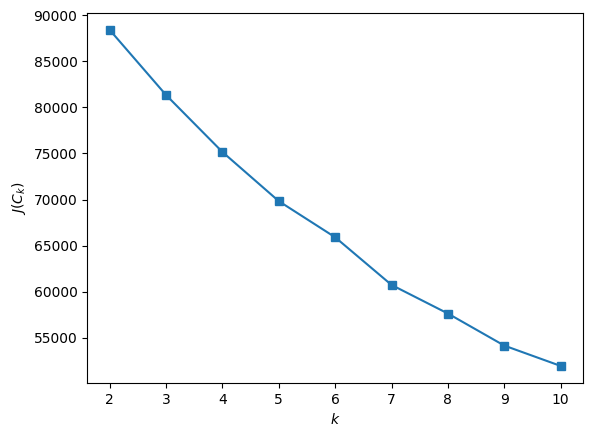

In [ ]:
# Список для инерций
inertias = []
ss = []

# Мы будем проверять от 1 до 10 кластеров
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(data_new)
    inertias.append(kmeans.inertia_)
    ss.append(silhouette_score(data_new, kmeans.labels_))

# Строим график
print(ss)
plt.plot(range(2, 11), inertias, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

# Коэффициент силуэта

,0,1
0,2,0.219920
1,3,0.233880
2,4,0.184637
3,5,0.138948
4,6,0.140849
5,7,0.163911
6,8,0.155708
7,9,0.162838
8,10,0.159881


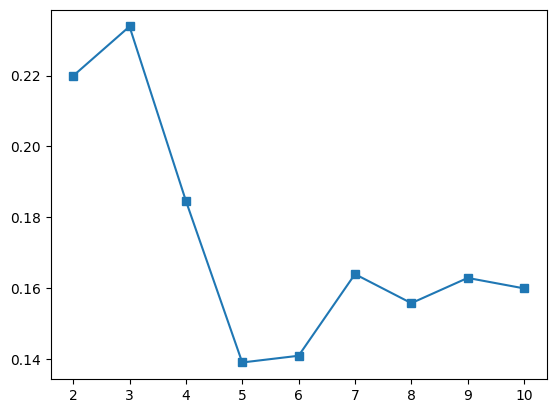

In [ ]:
silhouette = pd.DataFrame([x, y] for x, y in zip(range(2, 11), ss))
plt.plot(range(2, 11), ss, marker='s');
silhouette

# K-means

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=1).fit(data_new)
label = kmeans.fit_predict(data_new)
label

array([3, 3, 3, ..., 1, 4, 1], dtype=int32)

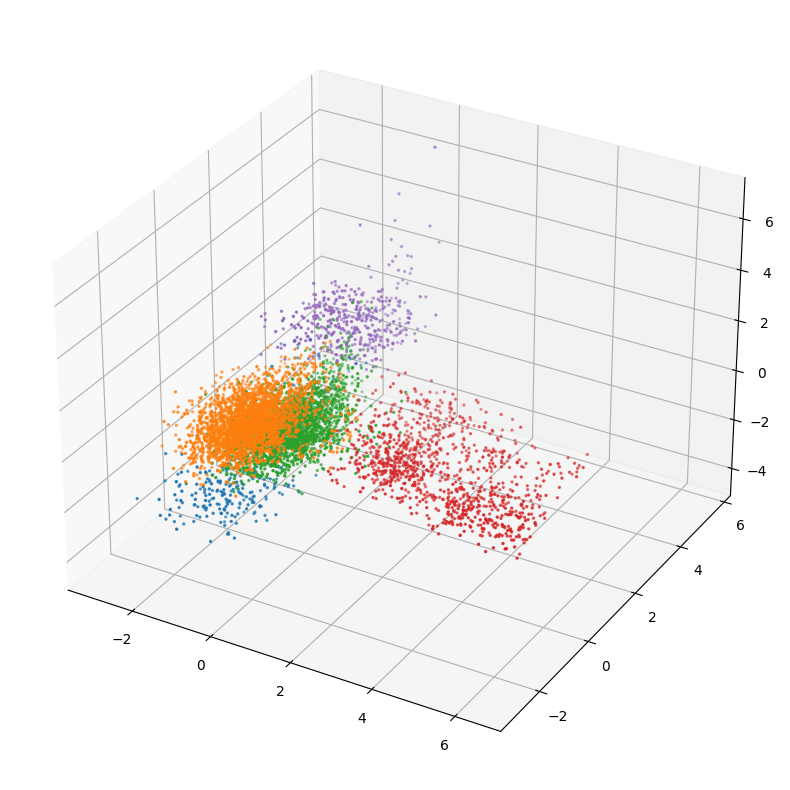

In [ ]:
from sklearn import decomposition

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
#plt.clf()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax = fig.add_subplot(111, projection='3d')
#plt.cla()

pca = decomposition.PCA(n_components=5)
X_centered = data_new - data_new.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

y = label
# И нарисуем получившиеся точки в нашем новом пространстве
ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], X_pca[y == 0, 3], s=2)
ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], X_pca[y == 1, 3], s=2)
ax.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], X_pca[y == 2, 3], s=2)
ax.scatter(X_pca[y == 3, 0], X_pca[y == 3, 1], X_pca[y == 3, 3], s=2)
ax.scatter(X_pca[y == 4, 0], X_pca[y == 4, 1], X_pca[y == 4, 3], s=2)
#plt.scatter(centroids_pca[0], centroids_pca[1], s = 20, color = 'k')
#plt.legend(loc=0);

# Иерархическая

In [ ]:
data_new.shape

(6551, 17)

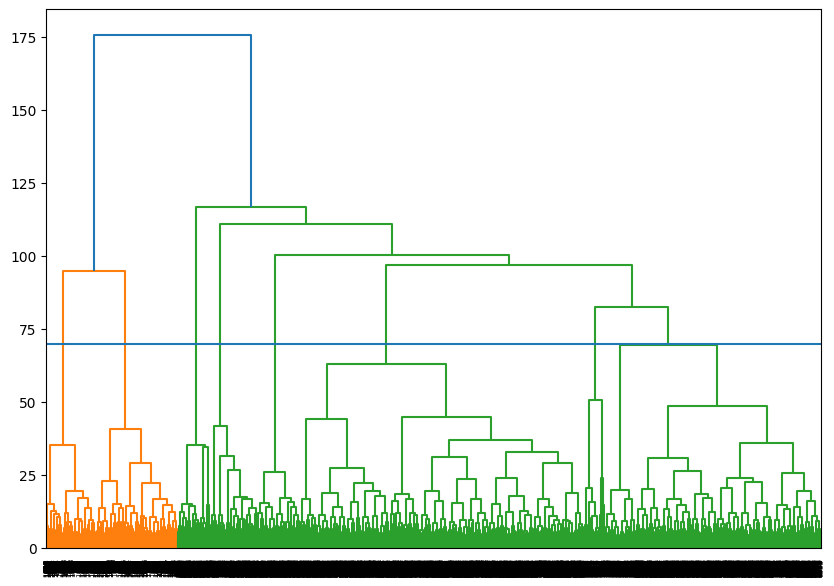

In [ ]:
fig = plt.figure(figsize = (10, 7))

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendogram = sch.dendrogram(sch.linkage(data_new, method = 'ward'))
plt.axhline(70)

# DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

clustering = DBSCAN(eps=3.75).fit(data_new)
print(list(clustering.labels_).count(-1))
np.unique(clustering.labels_)

1273


array([-1,  0])

In [ ]:
print(list(clustering.labels_).count(5))

10


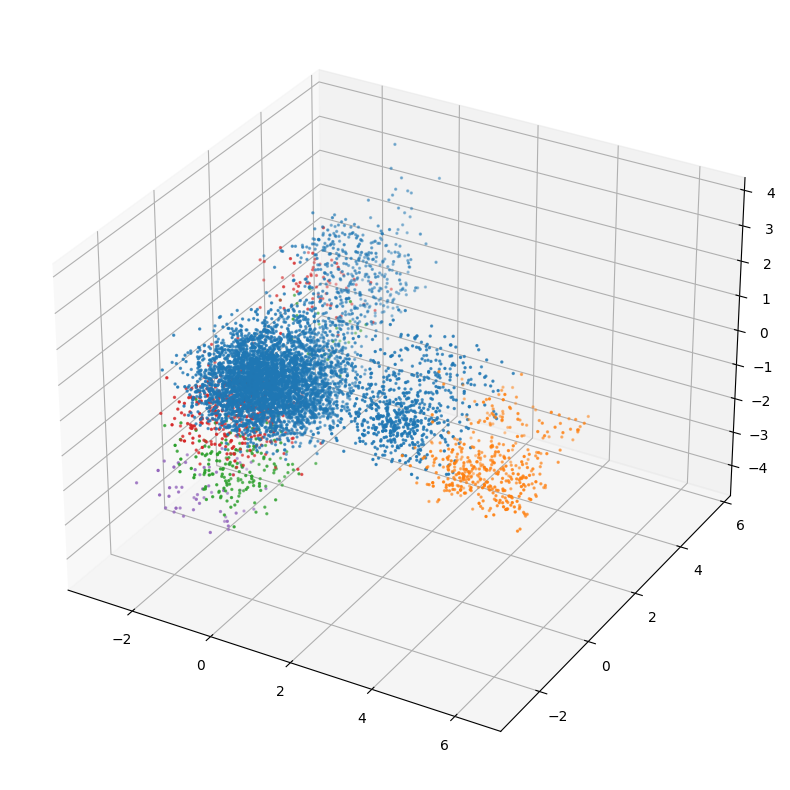

In [ ]:
fig = plt.figure(figsize=(10,10))
#plt.clf()
#ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax = fig.add_subplot(111, projection='3d')
#plt.cla()

pca = decomposition.PCA(n_components=5)
X_centered = data_new - data_new.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

y = clustering.labels_
# И нарисуем получившиеся точки в нашем новом пространстве
ax.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], X_pca[y == 0, 3], s=2)
ax.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], X_pca[y == 1, 3], s=2)
ax.scatter(X_pca[y == 2, 0], X_pca[y == 2, 1], X_pca[y == 2, 3], s=2)
ax.scatter(X_pca[y == 3, 0], X_pca[y == 3, 1], X_pca[y == 3, 3], s=2)
ax.scatter(X_pca[y == 4, 0], X_pca[y == 4, 1], X_pca[y == 4, 3], s=2)